#### Setup

In [1]:
from google.colab import drive
import sys

In [2]:
drive.mount('/content/drive')
sys.path.append('/content/drive/Shareddrives/CMPE260/')

Mounted at /content/drive


In [3]:
%run /content/drive/Shareddrives/CMPE260/code/rec_implementation_w_features.ipynb

cpu


#### Training

In [4]:
train_env = Environment_w_Features(train_matrix)

hits, dcgs = [], []
hits_all, dcgs_all = [], []
step, best_step = 0, 0
step, best_step, best_step_all = 0, 0, 0

users = np.random.permutation(apt_users)

In [5]:
for u in tqdm.tqdm(users):
    print('user =', u)
    user, country, age, memory = train_env.reset(u)

    for t in range(int(train_matrix[u].sum())):
      try:
        # given current state, get action using actor network
        action_emb = policy_network(state_representation(country, age, memory))
        action = policy_network.get_action(user, torch.tensor(train_env.memory[user.detach().cpu().numpy().astype(int), :]), state_representation, action_emb,
            torch.tensor([item for item in train_env.available_books if item not in train_env.viewed_books]).long()
        )
      except Exception as e:
        print(e)

      # update replay buffer
      user, memory, reward, done = train_env.step(action, action_emb, replay_buffer)

      # update weights of action and critic network
      if len(replay_buffer) > params['batch_size']:
          update(params['batch_size'], params['gamma'], params['min_value'], params['max_value'], params['soft_tau'])

      # monitor training process by evaluating on only one user for efficiency
      if step % 100 == 0 and step > 0:
          hit, dcg = evaluation(policy_network, state_representation, train_env.memory, test_loader)

          hits.append(hit)
          dcgs.append(dcg)

          if np.mean(np.array([hit, dcg]) - np.array([hits[best_step], dcgs[best_step]])) >= 0:
              best_step = step // 100
              torch.save(policy_network.state_dict(), params['log_w_features_dir'] + 'policy_net.pth')
              torch.save(value_network.state_dict(), params['log_w_features_dir'] + 'value_net.pth')
              torch.save(state_representation.state_dict(), params['log_w_features_dir'] + 'state_repr.pth')

      # evaluate for best policy after every 1000 steps on the whole test set
      if step % 1000 == 0 and step > 0:
          hit, dcg = evaluation(policy_network, state_representation, train_env.memory, full_loader)

          hits_all.append(hit)
          dcgs_all.append(dcg)

          if np.mean(np.array([hit, dcg]) - np.array([hits_all[best_step_all], dcgs_all[best_step_all]])) >= 0:
              best_step_all = step // 1000
              torch.save(policy_network.state_dict(), params['log_w_features_dir'] + 'best_policy_net.pth')
              torch.save(value_network.state_dict(), params['log_w_features_dir'] + 'best_value_net.pth')
              torch.save(state_representation.state_dict(), params['log_w_features_dir'] + 'best_state_repr.pth')

      step += 1

  0%|          | 0/52 [00:00<?, ?it/s]

user = 38


  2%|▏         | 1/52 [00:12<11:00, 12.95s/it]

user = 83


  4%|▍         | 2/52 [00:26<11:02, 13.26s/it]

user = 36


  6%|▌         | 3/52 [00:37<10:09, 12.44s/it]

user = 239


  8%|▊         | 4/52 [00:49<09:36, 12.02s/it]

user = 172


 10%|▉         | 5/52 [00:56<08:11, 10.46s/it]

user = 242


 12%|█▏        | 6/52 [01:10<08:51, 11.56s/it]

user = 132


 13%|█▎        | 7/52 [05:49<1:14:16, 99.02s/it]

user = 143


 15%|█▌        | 8/52 [05:58<51:29, 70.22s/it]  

user = 52


 17%|█▋        | 9/52 [06:08<36:55, 51.53s/it]

user = 5


 19%|█▉        | 10/52 [06:16<26:36, 38.00s/it]

user = 14


 21%|██        | 11/52 [06:25<19:52, 29.08s/it]

user = 226


 23%|██▎       | 12/52 [06:38<16:05, 24.15s/it]

user = 179


 25%|██▌       | 13/52 [11:12<1:05:03, 100.08s/it]

user = 27


 27%|██▋       | 14/52 [11:21<45:56, 72.55s/it]   

user = 78


 29%|██▉       | 15/52 [11:33<33:28, 54.28s/it]

user = 11


 31%|███       | 16/52 [11:42<24:17, 40.49s/it]

user = 1


 33%|███▎      | 17/52 [11:54<18:44, 32.12s/it]

user = 196


 35%|███▍      | 18/52 [12:03<14:14, 25.14s/it]

user = 21


 37%|███▋      | 19/52 [12:12<11:10, 20.33s/it]

user = 67


 38%|███▊      | 20/52 [16:52<52:24, 98.26s/it]

user = 70


 40%|████      | 21/52 [16:59<36:31, 70.71s/it]

user = 238


 42%|████▏     | 22/52 [17:08<26:07, 52.25s/it]

user = 134


 44%|████▍     | 23/52 [17:19<19:13, 39.77s/it]

user = 144


 46%|████▌     | 24/52 [17:29<14:27, 30.98s/it]

user = 141


 48%|████▊     | 25/52 [17:36<10:39, 23.69s/it]

user = 211


 50%|█████     | 26/52 [22:18<43:49, 101.12s/it]

user = 137


 52%|█████▏    | 27/52 [22:30<31:05, 74.62s/it] 

user = 213


 54%|█████▍    | 28/52 [22:42<22:15, 55.66s/it]

user = 199


 56%|█████▌    | 29/52 [22:49<15:44, 41.08s/it]

user = 22


 58%|█████▊    | 30/52 [22:59<11:41, 31.89s/it]

user = 105


 60%|█████▉    | 31/52 [23:09<08:46, 25.08s/it]

user = 212


 62%|██████▏   | 32/52 [23:20<07:02, 21.13s/it]

user = 205


 63%|██████▎   | 33/52 [28:02<31:25, 99.25s/it]

user = 82


 65%|██████▌   | 34/52 [28:14<21:54, 73.02s/it]

user = 203


 67%|██████▋   | 35/52 [28:23<15:13, 53.72s/it]

user = 93


 69%|██████▉   | 36/52 [28:36<11:06, 41.66s/it]

user = 222


 71%|███████   | 37/52 [28:44<07:55, 31.67s/it]

user = 243


 73%|███████▎  | 38/52 [28:54<05:51, 25.09s/it]

user = 124


 75%|███████▌  | 39/52 [33:41<22:26, 103.61s/it]

user = 198


 77%|███████▋  | 40/52 [33:51<15:07, 75.67s/it] 

user = 32


 79%|███████▉  | 41/52 [33:59<10:07, 55.23s/it]

user = 54


 81%|████████  | 42/52 [34:08<06:54, 41.49s/it]

user = 99


 83%|████████▎ | 43/52 [34:17<04:45, 31.73s/it]

user = 12


 85%|████████▍ | 44/52 [34:26<03:18, 24.86s/it]

user = 63


 87%|████████▋ | 45/52 [34:34<02:18, 19.75s/it]

user = 184


 88%|████████▊ | 46/52 [39:26<10:08, 101.48s/it]

user = 162


 90%|█████████ | 47/52 [39:37<06:11, 74.39s/it] 

user = 125


 92%|█████████▏| 48/52 [39:45<03:37, 54.49s/it]

user = 136


 94%|█████████▍| 49/52 [39:56<02:04, 41.39s/it]

user = 43


 96%|█████████▌| 50/52 [40:08<01:05, 32.57s/it]

user = 75


 98%|█████████▊| 51/52 [40:15<00:24, 24.91s/it]

user = 25


100%|██████████| 52/52 [44:42<00:00, 51.59s/it]


In [ ]:
# save memory
with open(params['log_w_features_dir'] + 'memory.pickle', 'wb') as f:
  pickle.dump(train_env.memory, f)

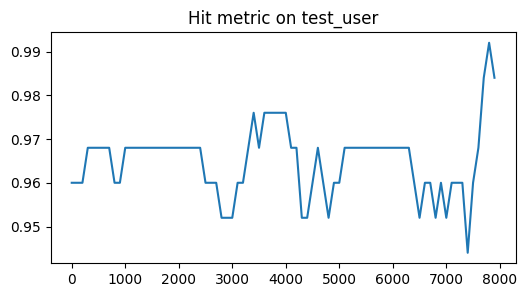

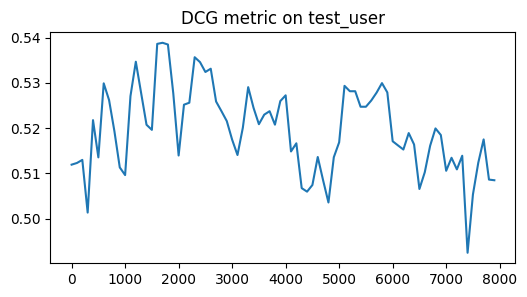

In [6]:
plot_hit(hits, 100, 'test_user')
plot_dcg(dcgs, 100, 'test_user')

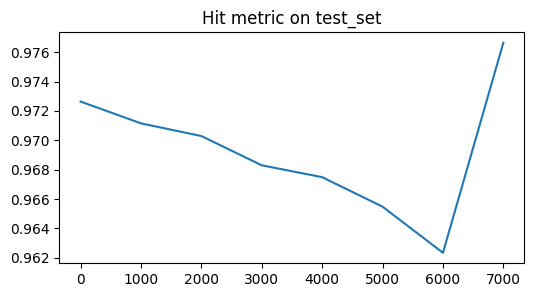

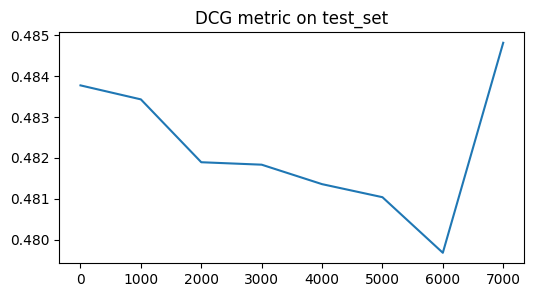

In [7]:
plot_hit(hits_all, 1000, 'test_set')
plot_dcg(dcgs_all, 1000, 'test_set')

#### Evaluation on test set

In [ ]:
with open(params['log_w_features_dir'] + 'memory.pickle', 'rb') as f:
    memory = pickle.load(f)

In [ ]:
# evaluate best policy on test set
state_rep = State_Representation_w_Features(num_of_countries, num_of_age_buckets, num_of_books, params['embedding_dim'], params['hidden_dim'])
policy = Actor(params['embedding_dim'], params['hidden_dim'])
state_rep.load_state_dict(torch.load(params['log_w_features_dir'] + 'best_state_repr.pth'))
policy.load_state_dict(torch.load(params['log_w_features_dir'] + 'best_policy_net.pth'))

<All keys matched successfully>

In [ ]:
hit, dcg = evaluation(policy, state_rep, memory, full_loader)
print('hit rate: ', hit, 'dcg: ', dcg)

hit rate:  0.9656041372825576 dcg:  0.47740640385509453


#### Inference

In [ ]:
random_user = test_data['user'].sample().iloc[0]
random_user

221

In [ ]:
temp_test_data = test_data[test_data.user == random_user]
temp = pd.merge(temp_test_data, filtered_df, on=['user', 'book'])
temp

,user,book,isbn,title,author,user_id,rating,best_seller
0,221,691,373218192,Engaging The Enemy,Nora Roberts,216012,7.0,True
1,221,1319,425192695,Girls of the Summer,Barbara Bretton,216012,7.0,False
2,221,1417,671864173,WAITING TO EXHALE,Terry McMillan,216012,9.0,True
3,221,1437,1551665638,Call It Destiny (Mira),Jayne Ann Krentz,216012,7.0,True
4,221,2590,373218036,"Truly, Madly Manhattan",Nora Roberts,216012,8.0,False
5,221,2891,373218958,Less Of A Stranger (Silhouette Single Title),Nora Roberts,216012,8.0,False
6,221,2959,373197187,Cattleman's Pride (Silhouette Romance),Diana Palmer,216012,8.0,True
7,221,3092,373218419,Blithe Images,Nora Roberts,216012,7.0,False
8,221,3257,373834349,Mail-Order Marriages (Harlequin Promo),Debbie Macomber,216012,8.0,False
9,221,4222,446610550,The Playboy,Carly Phillips,216012,7.0,False


In [ ]:
recommendations = []

for model, state_representation in zip([policy], [state_rep]):
    env = Environment(test_matrix)
    user, country, age, memory = env.reset(random_user)

    # give 2 books that the user has rated in the past
    user, memory, reward, _ = env.step(torch.tensor([3092]))
    user, memory, reward, _ = env.step(torch.tensor([4092]))

    # get next 3 recommendations based on the two books above
    recs = []
    for i in range(3):
        action_emb = model(state_representation(country, age, memory))
        action = model.get_action(
            user,
            torch.tensor(env.memory[user.detach().cpu().numpy().astype(int), :]),
            state_representation,
            action_emb,
            torch.tensor([item for item in env.available_books if item not in env.viewed_books]).long()
        )
        user, memory, reward, _ = env.step(action)
        recs.append(action)

    recommendations.append(recs)

In [ ]:
recos = [r.item() for r in recommendations[0]]
recos

[15653, 2959, 29394]

In [ ]:
recommended_books = filtered_df[filtered_df.book.isin(recos)][['title', 'author', 'best_seller']].drop_duplicates()
recommended_books

,title,author,best_seller
94446,Cattleman's Pride (Silhouette Romance),Diana Palmer,True
235903,The Arming of Europe and the Making of the Fir...,David G. Herrmann,True
348036,The Thousand-Mile War: World War II in Alaska ...,Brian Garfield,False
